# PRECISE TEXT SUMMARIZATION USING DEEP LEARNING AND NLP

# Text Summarization 

<div style="background-color:#cdd3dd; color:##cdd3dd; font-size:18px; font-family:cursive; padding:10px; border: 5px solid #19180F;">Text summarization is the process of condensing a longer piece of text into a shorter version while preserving the main ideas and key information. It aims to capture the essence of the original text and present it in a concise and coherent manner. The goal of text summarization is to save time and effort for readers by providing a summary that captures the most important points of the document.</div>

# Two types of Text Summarization 

<div style="background-color:#cdd3dd; color:##cdd3dd; font-size:18px; font-family:cursive; padding:10px; border: 5px solid #19180F;">
    
* Extractive Summarization: This approach involves selecting the most relevant sentences or phrases from the original text and combining them to form a summary. Extractive summarization methods typically rank sentences based on their importance, using techniques such as frequency analysis, statistical methods, or machine learning algorithms. The selected sentences are then arranged to create a coherent summary.

* Abstractive Summarization: In contrast to extractive summarization, abstractive summarization aims to generate a summary that may contain words, phrases, or even sentences that were not present in the original text. It involves understanding the meaning of the text and generating a summary in a more human-like manner. Abstractive methods often employ natural language processing (NLP) techniques, such as language generation models, to paraphrase and generate new sentences that capture the essential information.<div>

# BART


<div style="background-color:#cdd3dd; color:##cdd3dd; font-size:18px; font-family:cursive; padding:10px; border: 5px solid #19180F;">
BART (Bidirectional and Auto-Regressive Transformers) is a sequence-to-sequence model introduced by Facebook AI Research. It is based on the Transformer architecture and is designed for various natural language processing tasks, including text generation, text completion, and text classification.

BART combines ideas from both autoencoders and autoregressive models. It consists of an encoder-decoder architecture, where the encoder reads the input text and the decoder generates the output text. BART has a bidirectional structure, meaning it can take into account both the left and right context of a given word when generating the output sequence. </div>

# IMPORTING LIBRARIES

In [1]:

!pip install tensorflow==1.13.1
import numpy as np 
import pandas as pd 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import tensorflow as tf
import time
from tensorflow.python.layers.core import Dense
from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors
print('TensorFlow Version: {}'.format(tf.__version__))

ERROR: Could not find a version that satisfies the requirement tensorflow==1.13.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==1.13.1
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TensorFlow Version: 2.16.1


# BART Summarization Pre-Training Data Description: CNN/DM
The CNN/DailyMail dataset, as introduced by Hermann et al. in 2015, comprises 93,000 articles from CNN and 220,000 articles from the Daily Mail newspapers. Both publications include concise bullet-point summaries alongside their articles. A non-anonymized variant of this dataset can be found in the work by See et al. in 2017.


In [2]:
train_df = pd.read_csv(r"C:\Users\bhars\Desktop\harsha\text\cnn_dailymail\cnn_dailymail\train.csv")
test_df = pd.read_csv(r"C:\Users\bhars\Desktop\harsha\text\cnn_dailymail\cnn_dailymail\test.csv")
val_df = pd.read_csv(r"C:\Users\bhars\Desktop\harsha\text\cnn_dailymail\cnn_dailymail\validation.csv")

train_df.head(5)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


# EXPLORATORY DATA ANALYSIS

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [4]:
train_df.columns

Index(['id', 'article', 'highlights'], dtype='object')

In [5]:
# Data type of  spesific column
train_df.dtypes

id            object
article       object
highlights    object
dtype: object

In [6]:
# chech the null value in Data
train_df.isnull().sum()

id            0
article       0
highlights    0
dtype: int64

In [7]:
# Describe the data in Stastical
train_df.describe().T

,count,unique,top,freq
id,287113,287113,0001d1afc246a7964130f43ae940af6bc6c57f01,1
article,287113,284005,(CNN) -- Dubai could lose its place on the Wom...,3
highlights,287113,282197,This page includes the show Transcript and the...,83


In [8]:
# check the duplicate value
train_df.duplicated().T

0         False
1         False
2         False
3         False
4         False
          ...  
287108    False
287109    False
287110    False
287111    False
287112    False
Length: 287113, dtype: bool

In [9]:
# chech uniqu values
train_df.nunique()

id            287113
article       284005
highlights    282197
dtype: int64

In [10]:

from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textwrap import wrap


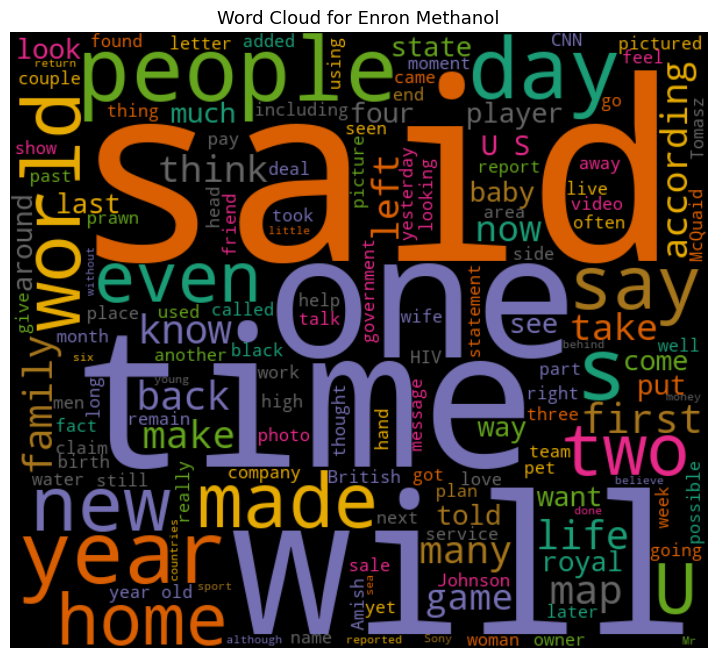

In [11]:
def wordcloud(data, title):
    wc = WordCloud(width=600, height=530, max_words=150, colormap="Dark2").generate_from_text(data)
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title, 60)), fontsize=13)
    plt.show()

text_data = train_df['article'][:50].str.cat(sep='\n')
lines = text_data.split("\n")
lines = [line.strip() for line in lines if line.strip() != ""]
preprocessed_text = " ".join(lines)
wordcloud(preprocessed_text, "Word Cloud for Enron Methanol")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


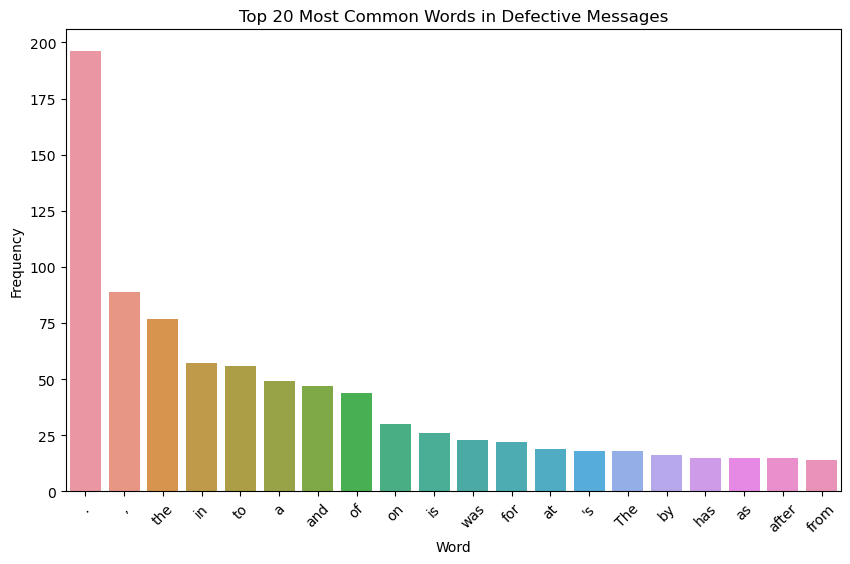

In [13]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

defective_data = train_df[:50]
defective_text = " ".join(defective_data['highlights'])
defective_words = word_tokenize(defective_text)
defective_word_freq = pd.Series(defective_words).value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=defective_word_freq[:20].index, y=defective_word_freq[:20].values)
plt.title("Top 20 Most Common Words in Defective Messages")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [14]:
def count_words(text):
    return len(text.split())

train_df['wordcnt_article'] = train_df['article'].apply(count_words)
train_df['wordcnt_summary'] = train_df['highlights'].apply(count_words)
train_df.head()

,id,article,highlights,wordcnt_article,wordcnt_summary
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,37
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,38
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,69
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,53
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,67


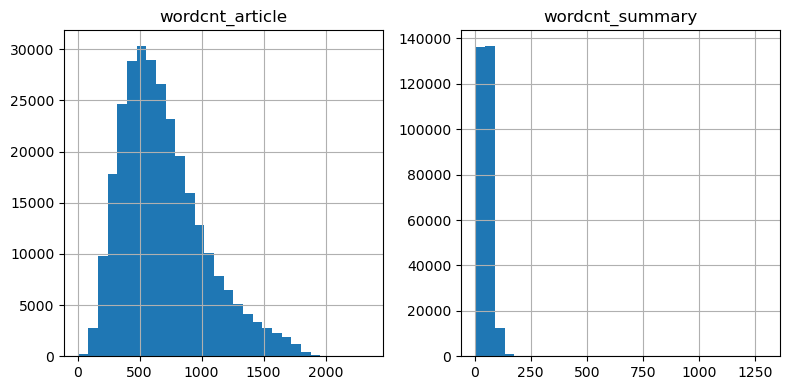

In [17]:
import matplotlib.pyplot as plt
numerical_columns = train_df.select_dtypes(include=['int64'])
numerical_columns.hist(bins=30, figsize=(8, 4)) 
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


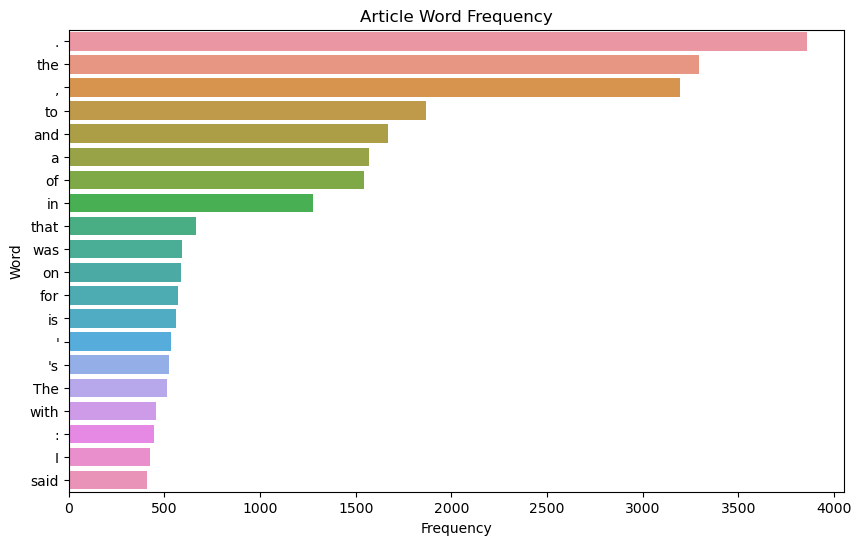

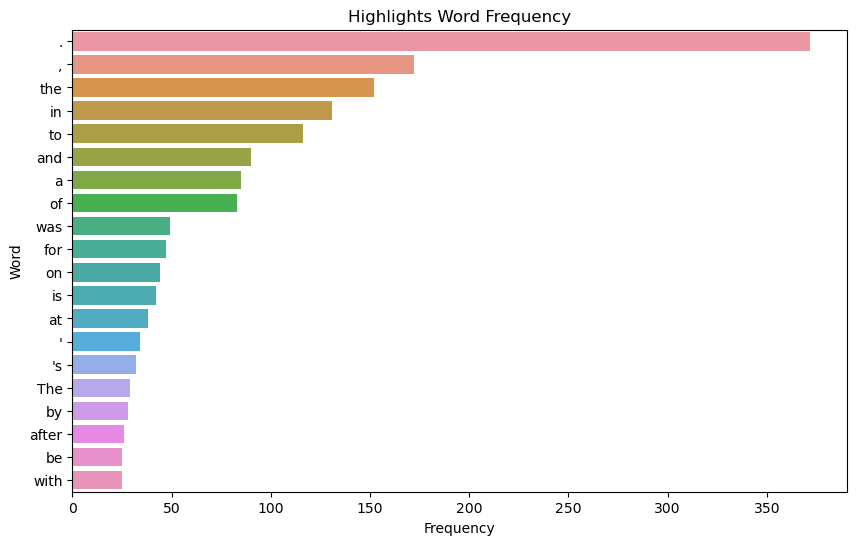

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize the text data
train_df['article_tokens'] = train_df['article'][:100].apply(word_tokenize)
train_df['highlights_tokens'] = train_df['highlights'][:100].apply(word_tokenize)

# Word Frequency Analysis
def plot_word_frequency(tokens, title):
    words = [word for sublist in tokens for word in sublist]
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    train_df_word_freq = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=train_df_word_freq)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_word_frequency(train_df['article_tokens'][:100], 'Article Word Frequency')
plot_word_frequency(train_df['highlights_tokens'][:100], 'Highlights Word Frequency')


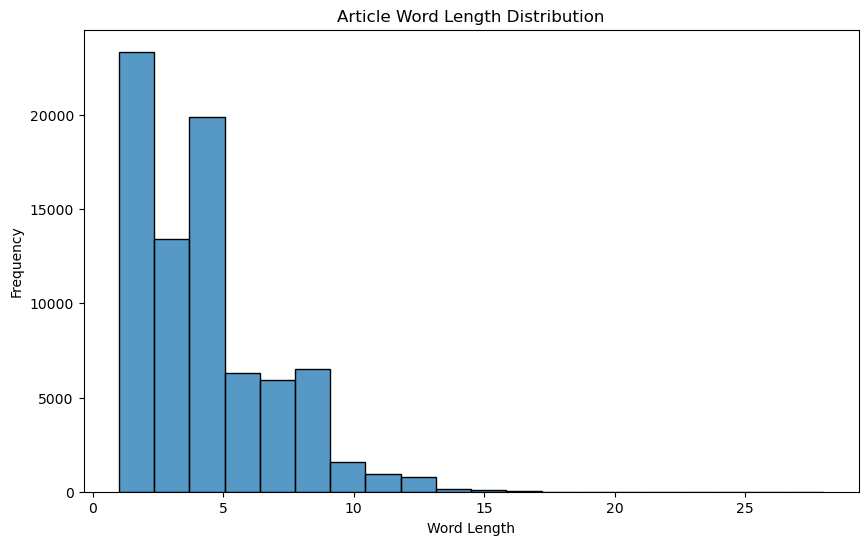

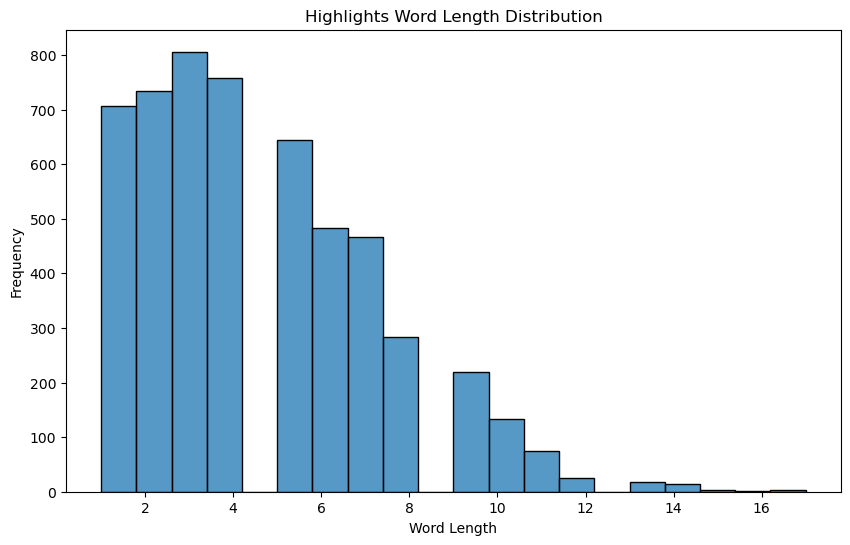

In [19]:

# Word Length Distribution
def plot_word_length_distribution(tokens, title):
    word_lengths = [len(word) for sublist in tokens for word in sublist]
    plt.figure(figsize=(10, 6))
    sns.histplot(word_lengths, bins=20)
    plt.title(title)
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.show()

plot_word_length_distribution(train_df['article_tokens'][:100], 'Article Word Length Distribution')
plot_word_length_distribution(train_df['highlights_tokens'][:100], 'Highlights Word Length Distribution')



In [20]:
filtered_train_df = train_df[train_df['wordcnt_article'] < 400]
filtered_train_df.describe()

,wordcnt_article,wordcnt_summary
count,55956.000000,55956.000000
mean,297.293230,43.238509
std,72.960876,15.588660
min,8.000000,6.000000
25%,248.000000,35.000000
50%,310.000000,41.000000
75%,358.000000,51.000000
max,399.000000,662.000000


In [21]:
for i in range(5):
    print("Review #",i+1)
    print('Original Text : ')
    print(train_df.article[i])
    print(".................")
    print('\n\nSummary Text : ')
    print(train_df.highlights[i])
    
    print('===========================================================================================================\n\n')

Review # 1
Original Text : 
By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a con

# Data preprocessing

In [22]:
train_df.columns

Index(['id', 'article', 'highlights', 'wordcnt_article', 'wordcnt_summary',
       'article_tokens', 'highlights_tokens'],
      dtype='object')

In [23]:
train_df.head()

,id,article,highlights,wordcnt_article,wordcnt_summary,article_tokens,highlights_tokens
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,37,"[By, ., Associated, Press, ., PUBLISHED, :, .,...","[Bishop, John, Folda, ,, of, North, Dakota, ,,..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,38,"[(, CNN, ), --, Ralph, Mata, was, an, internal...","[Criminal, complaint, :, Cop, used, his, role,..."
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,69,"[A, drunk, driver, who, killed, a, young, woma...","[Craig, Eccleston-Todd, ,, 27, ,, had, drunk, ..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,53,"[(, CNN, ), --, With, a, breezy, sweep, of, hi...","[Nina, dos, Santos, says, Europe, must, be, re..."
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,67,"[Fleetwood, are, the, only, team, still, to, h...","[Fleetwood, top, of, League, One, after, 2-0, ..."


In [24]:
# Keep only 'article' and 'highlights' columns
train_df = train_df[['article', 'highlights']]

train_df.head()


,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop = set(stopwords.words('english'))

In [27]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')
def clean_text(text, remove_stopwords=True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''

    text = text.lower()
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)

    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

def preprocess_text(text):
    '''Preprocess text by lowercasing, tokenizing, removing punctuation, stopwords, and stemming'''
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing Punctuation and Non-Alphanumeric Characters
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.isalnum()]

    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into text
    processed_text = ' '.join(tokens)

    return processed_text
s
train_df['cleaned_article'] = train_df['article'].apply(clean_text)
train_df['cleaned_highlights'] = train_df['highlights'].apply(clean_text)
print(train_df[['cleaned_article', 'cleaned_highlights']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\bhars\AppData\Local\Temp\ipykernel_24592\3401768955.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_article'] = train_df['article'].apply(clean_text)


                                          cleaned_article  \
0       associated press published 14 11 est 25 octobe...   
1       cnn ralph mata internal affairs lieutenant mia...   
2       drunk driver killed young woman head crash che...   
3       cnn breezy sweep pen president vladimir putin ...   
4       fleetwood team still 100 record sky bet league...   
...                                                   ...   
287108  james rush former first daughter chelsea clint...   
287109  apologetic vanilla ice given first proper inte...   
287110  america lethal sniper claimed wished would kil...   
287111  sara malm published 12 19 est 8 march 2013 upd...   
287112  cnn former florida gov jeb bush decided active...   

                                       cleaned_highlights  
0       bishop john folda north dakota taking time dia...  
1       criminal complaint cop used role help cocaine ...  
2       craig eccleston todd 27 drunk least three pint...  
3       nina dos santos say

C:\Users\bhars\AppData\Local\Temp\ipykernel_24592\3401768955.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_highlights'] = train_df['highlights'].apply(clean_text)


In [29]:

val_df['cleaned_article'] = val_df['article'].apply(clean_text)
val_df['cleaned_highlights'] = val_df['highlights'].apply(clean_text)
print(val_df[['cleaned_article', 'cleaned_highlights']])

                                         cleaned_article  \
0      sally forrest actress dancer graced silver scr...   
1      middle school teacher china inked hundreds ske...   
2      man convicted killing father sister former gir...   
3      avid rugby fan prince harry could barely watch...   
4      triple radio producer inundated messages prosp...   
...                                                  ...   
13363  shops allowed offer ‘click collect’ services p...   
13364  mo farah nationality called question spaniard ...   
13365  wolves kept promotion hopes alive routine 3 0 ...   
13366  brown university graduate student died jumping...   
13367  thousands young australians look buy first hom...   

                                      cleaned_highlights  
0      sally forrest actress dancer graced silver scr...  
1      works include pictures presidential palace yan...  
2      iftekhar murtaza 29 convicted year ago killing...  
3      prince harry attendance england crun

In [30]:
for i in range(5):
    print("Clean Review #", i+1)
    print(train_df['cleaned_article'][i])
    print(".........................")
    print(train_df['cleaned_highlights'][i])
    print()


Clean Review # 1
associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota pictured bishop located
.........................
bishop john folda no

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Importing modules </div>

In [31]:
!pip install rouge --quiet

In [32]:
import pandas as pd
import torch
from transformers import BartForConditionalGeneration, BartTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
from rouge import Rouge


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Defining custom dataset class </div>

In [33]:
class SummarizationDataset(Dataset):
    def __init__(self, data, tokenizer, max_input_length=512, max_output_length=128):
        self.data = data
        self.tokenizer = tokenizer
        self.max_input_length = max_input_length
        self.max_output_length = max_output_length
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        article = self.data.iloc[index]["article"]
        summary = self.data.iloc[index]["highlights"]
        input_ids = self.tokenizer.encode(article, max_length=self.max_input_length, truncation=True, padding="max_length")
        output_ids = self.tokenizer.encode(summary, max_length=self.max_output_length, truncation=True, padding="max_length")
        return {"input_ids": input_ids, "attention_mask": [int(token_id != 0) for token_id in input_ids], "decoder_input_ids": output_ids[:-1], "decoder_attention_mask": [1] * (len(output_ids) - 1), "labels": output_ids[1:]}


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Loading the dataset </div>

In [34]:

train_df = train_df[['cleaned_highlights', 'cleaned_article']].rename(columns={'cleaned_highlights': 'highlights', 'cleaned_article': 'article'})
train_df.head()


,highlights,article
0,bishop john folda north dakota taking time dia...,associated press published 14 11 est 25 octobe...
1,criminal complaint cop used role help cocaine ...,cnn ralph mata internal affairs lieutenant mia...
2,craig eccleston todd 27 drunk least three pint...,drunk driver killed young woman head crash che...
3,nina dos santos says europe must ready accept ...,cnn breezy sweep pen president vladimir putin ...
4,fleetwood top league one 2 0 win scunthorpe pe...,fleetwood team still 100 record sky bet league...


In [35]:

val_df = val_df[['cleaned_highlights', 'cleaned_article']].rename(columns={'cleaned_highlights': 'highlights', 'cleaned_article': 'article'})
val_df.head()


,highlights,article
0,sally forrest actress dancer graced silver scr...,sally forrest actress dancer graced silver scr...
1,works include pictures presidential palace yan...,middle school teacher china inked hundreds ske...
2,iftekhar murtaza 29 convicted year ago killing...,man convicted killing father sister former gir...
3,prince harry attendance england crunch match f...,avid rugby fan prince harry could barely watch...
4,nick slater colleagues uploaded picture facebo...,triple radio producer inundated messages prosp...


In [36]:
!pip install sentencepiece


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Loading the Auto tokenizer and model </div>

In [37]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")
model = AutoModel.from_pretrained("facebook/bart-base")

In [38]:
from transformers import BartForConditionalGeneration, BartTokenizer

model_ = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")



<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Defining the training and validation datasets </div>

In [39]:
train_dataset = SummarizationDataset(train_df, tokenizer)
val_dataset = SummarizationDataset(val_df, tokenizer)

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Defining collate function </div>

In [40]:
def collate_fn(batch):
    input_ids = [item["input_ids"] for item in batch]
    attention_mask = [item["attention_mask"] for item in batch]
    decoder_input_ids = [item["decoder_input_ids"] for item in batch]
    decoder_attention_mask = [item["decoder_attention_mask"] for item in batch]
    labels = [item["labels"] for item in batch]
    max_input_length = max(len(ids) for ids in input_ids)
    max_output_length = max(len(ids) for ids in decoder_input_ids)
    input_ids = [ids + [0] * (max_input_length - len(ids)) for ids in input_ids]
    attention_mask = [mask + [0] * (max_input_length - len(mask)) for mask in attention_mask]
    decoder_input_ids = [ids + [0] * (max_output_length - len(ids)) for ids in decoder_input_ids]
    decoder_attention_mask = [mask + [0] * (max_output_length - len(mask)) for mask in decoder_attention_mask]
    labels = [ids + [-100] * (max_output_length - len(ids)) for ids in labels]
    return {"input_ids": torch.tensor(input_ids), "attention_mask": torch.tensor(attention_mask), "decoder_input_ids": torch.tensor(decoder_input_ids), "decoder_attention_mask": torch.tensor(decoder_attention_mask), "labels": torch.tensor(labels)}


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Defining the train and val dataloaders </div>

In [41]:
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=2,collate_fn=collate_fn)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Defining the optimizer and learning rate scheduler </div>

In [42]:
optimizer = AdamW(model_.parameters(), lr=5e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=500, num_training_steps=10000)


C:\Users\bhars\anaconda3\Lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Guaging the steps per epoch as per the batch size </div>

In [43]:
len(train_loader),len(val_loader)

(143557, 6684)

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Fine tuning the model </div>

In [44]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_.to(device)
model_.train()
for epoch in range(20):
    train_loss = 0
    for step,batch in tqdm(enumerate(train_loader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        loss = model_(**batch).loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        if step==100 and step>0:
            print("Step-{},Train Loss-{}".format(step,loss.item()))
            break#intentionally breaking the training after 100 steps since it's going to take long to train
        train_loss += loss.item()
    train_loss /= len(train_loader)
    val_loss = 0
    model_.eval()
    with torch.no_grad():
        for step,batch in tqdm(enumerate(val_loader)):
            batch = {k: v.to(device) for k, v in batch.items()}
            loss = model_(**batch).loss
            val_loss += loss.item()
            if step==100 and step>0:
                print("Step-{},Val Loss-{}".format(step,loss.item()))
                break #intentionally breaking the training after 100 steps since it's going to take long to validate
        val_loss /= len(val_loader)
    model_.train()
    #break
    print(f"Epoch {epoch+1} train loss: {train_loss:.4f} val loss: {val_loss:.4f}")


100it [40:55, 24.56s/it]


Step-100,Train Loss-8.897782325744629


100it [04:32,  2.73s/it]


Step-100,Val Loss-7.716615200042725
Epoch 1 train loss: 0.0082 val loss: 0.1111


100it [16:17,  9.78s/it]


Step-100,Train Loss-2.4053101539611816


100it [04:12,  2.52s/it]


Step-100,Val Loss-3.073849678039551
Epoch 2 train loss: 0.0037 val loss: 0.0400


100it [49:22, 29.63s/it]


Step-100,Train Loss-1.5312646627426147


100it [04:14,  2.54s/it]


Step-100,Val Loss-1.9847818613052368
Epoch 3 train loss: 0.0016 val loss: 0.0248


100it [13:40,  8.20s/it]


Step-100,Train Loss-1.2398842573165894


100it [04:32,  2.72s/it]


Step-100,Val Loss-2.040055274963379
Epoch 4 train loss: 0.0012 val loss: 0.0257


100it [13:41,  8.21s/it]


Step-100,Train Loss-0.979900062084198


100it [04:32,  2.72s/it]


Step-100,Val Loss-1.9247239828109741
Epoch 5 train loss: 0.0011 val loss: 0.0239


100it [13:41,  8.21s/it]


Step-100,Train Loss-1.407501459121704


100it [04:31,  2.72s/it]


Step-100,Val Loss-1.8254467248916626
Epoch 6 train loss: 0.0010 val loss: 0.0220


100it [13:41,  8.21s/it]


Step-100,Train Loss-1.3853753805160522


100it [04:32,  2.72s/it]


Step-100,Val Loss-1.7871872186660767
Epoch 7 train loss: 0.0010 val loss: 0.0217


100it [13:33,  8.13s/it]


Step-100,Train Loss-1.2208127975463867


100it [04:13,  2.53s/it]


Step-100,Val Loss-1.8993849754333496
Epoch 8 train loss: 0.0010 val loss: 0.0228


100it [12:46,  7.67s/it]


Step-100,Train Loss-1.4896341562271118


100it [04:13,  2.54s/it]


Step-100,Val Loss-1.8856663703918457
Epoch 9 train loss: 0.0012 val loss: 0.0237


100it [12:47,  7.68s/it]


Step-100,Train Loss-1.6975696086883545


100it [04:13,  2.54s/it]


Step-100,Val Loss-1.7985590696334839
Epoch 10 train loss: 0.0011 val loss: 0.0215


100it [12:45,  7.66s/it]


Step-100,Train Loss-1.424098253250122


100it [04:07,  2.47s/it]


Step-100,Val Loss-1.789016604423523
Epoch 11 train loss: 0.0010 val loss: 0.0217


100it [12:43,  7.64s/it]


Step-100,Train Loss-1.5418533086776733


100it [04:12,  2.53s/it]


Step-100,Val Loss-1.6830652952194214
Epoch 12 train loss: 0.0010 val loss: 0.0208


100it [12:34,  7.55s/it]


Step-100,Train Loss-1.589034914970398


100it [04:06,  2.46s/it]


Step-100,Val Loss-1.6549954414367676
Epoch 13 train loss: 0.0011 val loss: 0.0206


100it [12:30,  7.50s/it]


Step-100,Train Loss-1.0042316913604736


100it [04:10,  2.50s/it]


Step-100,Val Loss-1.6846357583999634
Epoch 14 train loss: 0.0010 val loss: 0.0215


100it [12:35,  7.55s/it]


Step-100,Train Loss-1.1874794960021973


100it [04:05,  2.45s/it]


Step-100,Val Loss-1.7321563959121704
Epoch 15 train loss: 0.0010 val loss: 0.0208


100it [12:36,  7.56s/it]


Step-100,Train Loss-1.3336700201034546


100it [04:12,  2.52s/it]


Step-100,Val Loss-1.7037204504013062
Epoch 16 train loss: 0.0009 val loss: 0.0201


100it [13:03,  7.84s/it]


Step-100,Train Loss-1.7206401824951172


100it [04:30,  2.71s/it]


Step-100,Val Loss-1.6912511587142944
Epoch 17 train loss: 0.0009 val loss: 0.0205


100it [13:38,  8.18s/it]


Step-100,Train Loss-1.213919758796692


100it [04:31,  2.71s/it]


Step-100,Val Loss-1.7293099164962769
Epoch 18 train loss: 0.0009 val loss: 0.0206


100it [13:43,  8.23s/it]


Step-100,Train Loss-1.1396986246109009


100it [04:31,  2.71s/it]


Step-100,Val Loss-1.606582760810852
Epoch 19 train loss: 0.0009 val loss: 0.0199


100it [13:43,  8.23s/it]


Step-100,Train Loss-1.575547695159912


100it [04:30,  2.71s/it]

Step-100,Val Loss-1.686834692955017
Epoch 20 train loss: 0.0009 val loss: 0.0199


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Intentionally breaking the training after 100 steps since it's going to take time to train ! Feel free to uncomment relevant lines to train more ! </div>

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Saving the fine tuned model </div>

In [109]:
model_.save_pretrained("fine_tuned_bart")
tokenizer.save_pretrained("fine_tuned_bart")


('fine_tuned_bart12\\tokenizer_config.json',
 'fine_tuned_bart12\\special_tokens_map.json',
 'fine_tuned_bart12\\vocab.json',
 'fine_tuned_bart12\\merges.txt',
 'fine_tuned_bart12\\added_tokens.json')

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Loading the fine tuned model and tokenizer </div>

In [110]:
model = BartForConditionalGeneration.from_pretrained("fine_tuned_bart")
tokenizer = BartTokenizer.from_pretrained("fine_tuned_bart")


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Defining the test dataset </div>

In [111]:
test_dataset = SummarizationDataset(test_df, tokenizer)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Defining the test dataloader </div>

In [112]:
test_loader = DataLoader(test_dataset, batch_size=1,collate_fn=collate_fn)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Generating predictions on the test dataset </div>

In [113]:
len(test_loader)

11490

In [114]:
model.to(device)
model.eval()
predictions = []
with torch.no_grad():
    for step, batch in tqdm(enumerate(test_loader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        output_ids = model.generate(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"], max_length=128, decoder_start_token_id=tokenizer.pad_token_id)
        batch_predictions = [tokenizer.decode(ids, skip_special_tokens=True) for ids in output_ids]
        predictions.extend(batch_predictions)
        if step==150:
            break # breaking after generating 100 predictions.. since it's going to take long to predict on entire set


150it [07:09,  2.86s/it]


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Comment break to generate predictions on entire set and also the slicing in the test_df below </div>

In [72]:
len(test_df)

11490

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Writing predicted summary to a new test set </div>

In [53]:
test_dfh = test_df[:150]  # Slice to 150 rows
predictions = predictions[:150]  # Ensure predictions has 150 elements
test_dfh["predictions"] = predictions
test_dfh.to_csv("test_predictions3.csv", index=False)


C:\Users\bhars\AppData\Local\Temp\ipykernel_13596\3255835742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfh["predictions"] = predictions


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Checking the generated summaries. </div>

In [74]:
test_dfh

,id,article,highlights,predictions
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,experts say plane seats appear to be getting ...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,"Rahul Kumar, 17, clambered over the enclosure..."
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,ie Freedman is set to sign a new two-year deal...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,neto is also wanted by PSG and clubs in Spain...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...",Bruce Jenner will break his silence in a two h...
...,...,...,...,...
145,50da4b5ae3082ff8e9a18c37c12ce67be16c5589,Johannesburg (CNN)South African troops deploye...,South African troops help police conduct raids...,troops deployed johannesburg as part of a new...
146,aed24872367a7268c19ccdf1ac628cf386ea47aa,Veteran Burnley defender Michael Duff believes...,The veteran Burnley defender believes Dyche co...,michael Duff believes manager Sean Dyche could...
147,37e94bbc8fbced5a08a1d869f8b752b43c605680,(CNN)Call it a little piece of heaven for a fa...,Sierra Sharry was eight months pregnant when h...,Sierra Sharry and Lane Smith were just about ...
148,d6a9784d1ffee56969b3e54ebd39fe3621470c4f,A former lager lout who ballooned to 24 stone ...,Dale Forrest would go out drinking regularly a...,rugby prop Dale Forrest decided to ditch the ...


<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px"> Introduction to ROUGE </div>
<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
ROUGE (Recall-Oriented Understudy for Gisting Evaluation) is a set of metrics used to assess the value of automatic summaries or machine-generated text by contrasting them with reference summaries created by humans. In terms of shared n-grams, or the length of consecutive words or characters, ROUGE calculates the overlap between the generated summary and the reference summaries.<br>
<br>
These are the three ROUGE variations that are most frequently used.<br>
- ROUGE-1, also referred to as unigram ROUGE, calculates the amount of overlap between the reference summaries and the summaries that were generated.
Based on the shared unigrams, it computes accuracy, recall, and F1-score.<br>
- ROUGE-2, also referred to as bigram ROUGE, measures how much the generated summary and the reference summaries overlap in terms of consecutive word pairs. It takes into account the F1-score, recall, and precision of shared bigrams.<br>
- ROUGE-L: The LCS between the reference summaries and the generated summaries is the main focus of the ROUGE-L metric. The shared LCS, which stands for the longest word sequence that appears in both the generated summary and the reference summaries, is the basis for computing precision, recall, and F1-score. Longer summaries can be evaluated using ROUGE-L, which also captures the coherence of the generated text.<br>
<br>
These ROUGE scores aid in evaluating the generated summary's quality and similarity to the reference summaries. Greater overlap and similarity are indicated by higher ROUGE scores, which shows that the generated summary effectively captures the main points of the references. In the field of natural language processing and summarization, ROUGE scores are frequently used to unbiasedly assess the efficacy of summarization models and contrast various strategies.<br></div>


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 1px solid #19180F;border-radius:10px">
Evaluating Performance via Rouge Metrics(ROUGE-1,ROUGE-2 and ROUGE-L) </div>


In [107]:
import pandas as pd
pre=pd.read_csv(r"test_predictions3.csv")

In [108]:
pre

,id,article,highlights,predictions
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,experts say plane seats appear to be getting ...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,"Rahul Kumar, 17, clambered over the enclosure..."
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,ie Freedman is set to sign a new two-year deal...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,neto is also wanted by PSG and clubs in Spain...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...",Bruce Jenner will break his silence in a two h...
5,5ed5e3fbd235a8046cd3b87f4a1aa51b856c8ec3,This is the moment that a crew of firefighters...,Giant pig fell into the swimming pool at his h...,"pig fell into a swimming pool in Ringwood, Ha..."
6,6394f51b120ceb3da5e7b53dd5167fc4cf80b514,The amount of time people spend listening to B...,Figures show that while millions still tune in...,listeners spent just ten hours a week tuning ...
7,98be9b2d558c17df8a13597195957a7c8587ddcd,"(CNN)So, you'd like a ""Full House"" reunion and...","Show will return with a one-hour special, foll...",star says new series will feature Candace Cam...
8,57f68638739c3a1de8d9922b389d6ded39977012,"At 11:20pm, former world champion Ken Doherty ...",Reanne Evans faced Ken Doherty in World Champi...,anne Evans potted a final black and extinguish...
9,20778c35c19d741cc182719de336d71e1a0b228e,A gang of six men have been jailed for a total...,Gang have been jailed for a total of 31 years ...,six men jailed 31 years following sexual offe...


In [72]:
from rouge import Rouge
import pandas as pd

# Load the test predictions CSV file
pre = pd.read_csv("test_predictions3.csv")

# Initialize Rouge
rouge = Rouge()
#Calculating the average rouge score
scores={}
scores = rouge.get_scores(pre["predictions"].tolist(), pre["highlights"].tolist(), avg=True)
rouge1=scores["rouge-1"]
rouge2=scores["rouge-2"]
rougel=scores["rouge-l"]



In [73]:
board_dict = {
    'ROUGE-1': {
        'precision': rouge1['p'],
        'Recall':rouge1['r'] ,
        'f-score':rouge1['f']    },
    'ROUGE-2': {
        'precision': rouge2['p'],
        'Recall':rouge2['r'] ,
        'f-score':rouge2['f']
    },
    'ROUGE-l': {
         'precision': rougel['p'],
        'Recall':rougel['r'] ,
        'f-score':rougel['f']
    }    
}


In [74]:
from tabulate import tabulate
import pandas as pd

# Assuming board_dict is your dictionary
dframe = pd.DataFrame(board_dict)
print(tabulate(dframe.T, headers="keys"))


           precision    Recall    f-score
-------  -----------  --------  ---------
ROUGE-1     0.338714  0.42408    0.363939
ROUGE-2     0.138623  0.175992   0.148982
ROUGE-l     0.306764  0.382913   0.328978


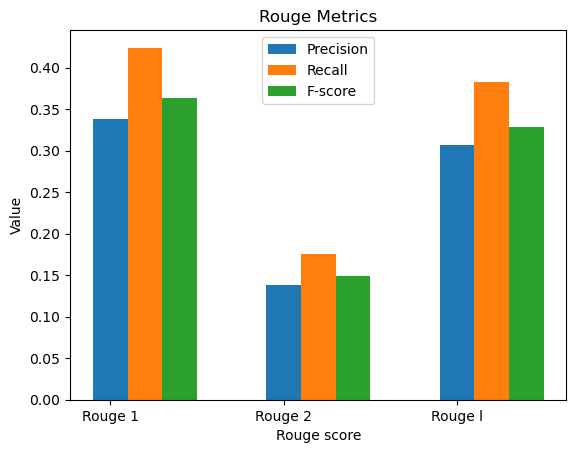

In [75]:
import matplotlib.pyplot as plt 
import numpy as np
# Define Data

metrics = ['Rouge 1','Rouge 2','Rouge l']
p = rouge1['p'],rouge2['p'],rougel['p']
r = rouge1['r'],rouge2['r'],rougel['r']
f = rouge1['f'],rouge2['f'],rougel['f']

x_axis = np.arange(len(metrics))

# Multi bar Chart
plt.bar(x_axis +0.0,p,0.2, label = 'Precision')
plt.bar(x_axis +0.2,r,0.2, label = 'Recall')
plt.bar(x_axis +0.4,f,0.2, label = 'F-score')

plt.xticks(x_axis,metrics)
plt.xlabel("Rouge score")
plt.ylabel("Value")
plt.title("Rouge Metrics")
plt.legend()
plt.show()
